### *K* -ближайших соседей

Метод ***k*-ближайших соседей** (k-nearest neighbors algorithm, kNN) отличается своей простотой.  
Обучение алгоритма заключается в запоминании обучающей выборки. В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространенным среди *k* соседей данного объекта, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по *k* ближайшим к нему объектам, значения которых уже известны.

**KNN для классификации:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
**KNN для регрессии:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

![img](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-22-at-2.34.57-PM.png)

Алгоритм KNN для классификации может быть описан следующими шагами:  
1. Выбрать число *k* соседей и метрику расстояния (например, [евклидово расстояние](https://wiki.loginom.ru/articles/euclid-distance.html)).  
2. Найти *k* ближайших соседей объекта, который мы хотим классифицировать.  
3. Присвоить метку класса мажоритарным голосованием.  

Основываясь на выбранной метрике расстояния, алгоритм KNN находит в тренировочном наборе данных *k* объектов, которые являются самыми близкими к классифицируемуму объекту (самыми похожими на него). Метка класса классифицируемого объекта определяется мажоритарным голосованием среди его *k* ближайших соседей.


Данные для выполнения практического задания представлены в файле "knn_data.xlsx". Эти данные были когда-то сгенерированы мной с помощью [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html). Вы можете сгенерировать свой набор данных, используя возможности модуля [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).  
В файле "knn_data.xlsx" x1, x2 - признаки, y - метка класса.

Задание 1. Обучите KNN-модель на этих данных. Оцените полученный результат.  
Задание 2 (**не обязательное**). KNN легко реализовать самостоятельно, используя стандартные конструкции языка Python. Попробуйте! Это отличная тренировка! :)

In [1]:
import pandas as pd
df = pd.read_excel('knn_data.xlsx')

In [2]:
df

,x1,x2,class
0,-6.005674,-4.854007,1
1,0.937182,-10.939275,1
2,8.158951,-7.719885,1
3,4.814693,-2.841937,1
4,-3.602122,-10.576468,1
...,...,...,...
95,-6.006420,-1.944295,1
96,8.083901,-3.041803,1
97,6.209541,1.918128,1
98,3.243569,-9.595519,0


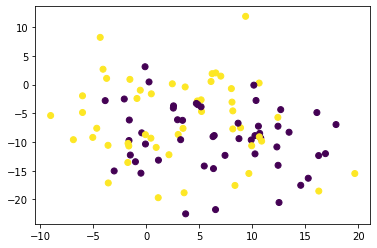

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], c = df['class'])

**Вот такие данные!**

In [4]:
X = df[['x1', 'x2']]
y = df['class']

In [5]:
# Разделим набор данных
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Как построить модель KNN с помощью Sklearn?  
KNN надохится в модуле sklearn.neighbors. Импортируем:

In [6]:
from sklearn.neighbors import KNeighborsClassifier

Далее нам необходимо создать экземпляр класса и указать количество соседей. Количество соседей задается с помощью параметра n_neighbors:

In [7]:
neigh = KNeighborsClassifier(n_neighbors=3) # Для примера возьмем 3, можно выбрать другое число и посмотреть как изменится качество

Обучить модель позволяет метод fit, предсказать метки класса можно с помощью метода predict, а оценить качество модели позволяет метод score, который возвращает долю правильных ответов.   
Вы можете для оценки качества использовать другую метрику (не забудьте импортировать соответствующую функцию!).

In [8]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
neigh.score(X_test, y_test) # Доля правильных ответов

0.7

Интересный пример: https://habr.com/ru/post/149693/